<a href="https://colab.research.google.com/github/SMayienda/sarah_m/blob/main/TEAM_SLYTHERIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### BUSINESS UNDERSTANDING

Retailing involves the process of selling merchandise and certain services to customers through multiple supply chains to make a profit. People have been sharing, selling bartering and consuming resources for nearly as long as people have existed. This form of trading has evolved over the years especially after the industrial revolution when retailing really took off. Currently, retail is one of the most important aspects in the chain distribution channel. The most common examples of retailing include globally recognized stores such as Big Mart, Walmart, Target and Best Buy. Retailing also includes small kiosks at a local mall.
Big Mart is an international well known brand which has stocks of expansive items, from groceries and soft drinks to tobacco products, magazines and newspapers. With more than 40 outlets in the world, Big Mart is taking over the retail industry. In time, Big Mart will be the most preferred convenience store,  taking into account their excellent customer service and high quality products. Big Mart aims at improving their products and customer service even further, considering the manner in which they highly prioritize customer satisfaction.

Big Mart has 1559 products in 10 stores as of 2013 data that need to be critically analyzed to get some insights to aid better decision making.

Our main objective is to understand the attributes of products in Big Mart and the attributes of Big Mart outlets which create important insights for decision making.



#### DESCRIPTION OF OUR DATASET

ProductID : unique product ID

Weight : weight of products

FatContent : specifies whether the product is low on fat or not

Visibility : percentage of total display area of all products in a store allocated to the particular product.

ProductType : the category to which the product belongs.

MRP : Maximum Retail Price (listed price) of the products.

OutletID : unique store ID.

EstablishmentYear : year of establishment of the outlets.

OutletSize : the size of the store in terms of ground area covered.

LocationType : the type of city in which the store is located.

OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket.

OutletSales : (target variable) sales of the product in the particular store.

Importing Libraries

In [ ]:
# loading the libraries that we will use
import pandas as pd
import numpy as np
import seaborn as sns


Reading the dataset from the csv file

In [ ]:
# Loading our dataset
train_set = pd.read_csv('Train-Set.csv')

Accessing information about our dataset

In [ ]:
print(train_set.shape)
print(train_set.info())

(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


# Data Cleaning

Validity

In [ ]:
# Dropping irrelevant column
# Weight column does not directly affect the MRP and therefore it does not affect the outlet sales.

train_set.drop(['Weight'], axis = 1, inplace = True)

Completeness

In [ ]:
# Checking for null values
train_set.isnull().sum()

ProductID               0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [ ]:
# Data Action: replacing missing values with a dash
# Explanation: the missing values from outlet size column are important so we replaced the missing values with a dash

train_set['OutletSize'].fillna('Other', inplace= True)

train_set.head(5)


,ProductID,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# checking if we have replaced our null values

train_set.isnull().sum().sum()

0

Accuracy

In [ ]:
# Checking for duplicates
train_set.duplicated().sum()

0

Uniformity

In [ ]:
# changing the column names to lower case.

train_set.columns=train_set.columns.str.strip().str.lower()
train_set.head(5)

,productid,fatcontent,productvisibility,producttype,mrp,outletid,establishmentyear,outletsize,locationtype,outlettype,outletsales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Data Action: Checking the uniformity in column values
# Uniformity in categorical values improves the acurracy of analysis

print(train_set['fatcontent'].unique())

train_set['fatcontent']= train_set.fatcontent.str.replace('low fat', 'Low Fat').str.replace('LF', 'Low Fat').str.replace('reg', 'Regular')
print(train_set['fatcontent'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'Regular']


In [ ]:
# Data Action: changing the column names
# Explanation: to ensure uniformity and easy access to the columns.

train_set.rename(columns={'productid':'product_id', 'fatcontent':'fat_content', 'productvisibility':'product_visibility',
                          'producttype':'product_type', 'mrp':'mrp', 'outletid':'outlet_id', 'establishmentyear':'establishment_year',
                          'outletsize':'outlet_size', 'locationtype':'location_type', 'outlettype':'outlet_type', 'outletsales':'outlet_sales'}, inplace=True)


In [ ]:
# Data Action: changing the establishment year column to datetime
# Explanation: the data type for year is date.

train_set['establishment_year']=pd.to_datetime(train_set['establishment_year'], format='%Y')

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          8523 non-null   object        
 1   fat_content         8523 non-null   object        
 2   product_visibility  8523 non-null   float64       
 3   product_type        8523 non-null   object        
 4   mrp                 8523 non-null   float64       
 5   outlet_id           8523 non-null   object        
 6   establishment_year  8523 non-null   datetime64[ns]
 7   outlet_size         8523 non-null   object        
 8   location_type       8523 non-null   object        
 9   outlet_type         8523 non-null   object        
 10  outlet_sales        8523 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 732.6+ KB


In [ ]:
# Data Action: converting our outlet sales and mrp column values to integers
# Explanation: floats create complex number in the analysis

train_set = train_set.astype({'outlet_sales':int, 'mrp': int})

Checking for outliers

In [ ]:
# importing the required library

import matplotlib.pyplot as plt
% matplotlib inline

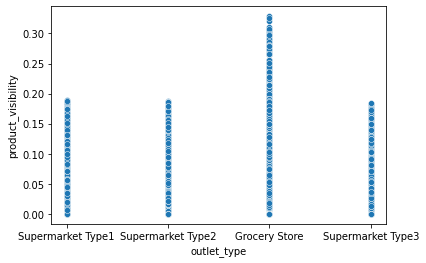

In [ ]:
# Checking for outliers in the product visibility column

#train_set.boxplot(column =['product_visibility'], grid = False)

# Checking where outliers lie the most.
# Grocery outlets have the outliers on product visibility
#sns_trainset = sns.load_dataset(train_set)
sns.scatterplot(data= train_set, x= "outlet_type", y="product_visibility")

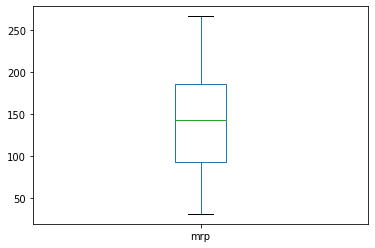

In [ ]:
# checking for outliers in the mrp column

train_set.boxplot(column=['mrp'], grid = False)

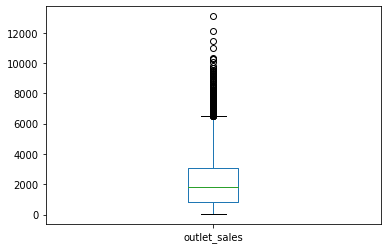

In [ ]:
# checking for outliers in the outlet sales column

train_set.boxplot(column=['outlet_sales'], grid=False)

Exporting our dataset

In [ ]:
#Exporting our cleaned dataset
train_set.to_csv('new_train_set.csv')

 # DATA ANALYSIS WITH SQL

Connecting to our database

In [ ]:
# loading the sql extension into our environment

%load_ext sql
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @None'

Importing Data from CSV files

In [ ]:
# Importing the pandas library
# We will use a function read_csv from pandas to read our datasets as shown
#
import pandas as pd

In [ ]:
# loading our csv dataset

with open('new_train_set.csv', 'r') as f:
  new_train_set=pd.read_csv(f, index_col=0, encoding='utf-8')

# storing the table in our sqlite database

%sql DROP TABLE IF EXISTS new_train_set
%sql PERSIST new_train_set;

 * sqlite://
Done.
 * sqlite://


'Persisted new_train_set'

Previewing our dataset

In [ ]:
%%sql
SELECT * FROM new_train_set LIMIT 10;

 * sqlite://
Done.


index,product_id,fat_content,product_visibility,product_type,mrp,outlet_id,establishment_year,outlet_size,location_type,outlet_type,outlet_sales
0,FDA15,Low Fat,0.016047301,Dairy,249,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,Regular,0.019278216,Soft Drinks,48,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443
2,FDN15,Low Fat,0.016760075,Meat,141,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,Regular,0.0,Fruits and Vegetables,182,OUT010,1998-01-01,Other,Tier 3,Grocery Store,732
4,NCD19,Low Fat,0.0,Household,53,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994
5,FDP36,Regular,0.0,Baking Goods,51,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,556
6,FDO10,Regular,0.012741089,Snack Foods,57,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,343
7,FDP10,Low Fat,0.127469857,Snack Foods,107,OUT027,1985-01-01,Medium,Tier 3,Supermarket Type3,4022
8,FDH17,Regular,0.016687114,Frozen Foods,96,OUT045,2002-01-01,Other,Tier 2,Supermarket Type1,1076
9,FDU28,Regular,0.09444959,Frozen Foods,187,OUT017,2007-01-01,Other,Tier 2,Supermarket Type1,4710


# Answering the specific objectives of the project

The most sold product? What was the total sales?

In [ ]:
%%sql
SELECT product_type, sum(outlet_sales) FROM new_train_set
GROUP BY product_type
ORDER BY sum(outlet_sales) desc
LIMIT 1;

 * sqlite://
Done.


product_type,sum(outlet_sales)
Fruits and Vegetables,2819435


Which type of  fat content product has the most sales? What was the total sales?

In [ ]:
%%sql
SELECT fat_content, SUM(outlet_sales) FROM new_train_set
GROUP BY fat_content
ORDER BY SUM(outlet_sales) desc
LIMIT 1;



 * sqlite://
Done.


fat_content,SUM(outlet_sales)
Low Fat,11901328


The most visible product? Is it the most selling product?

In [ ]:
# The most visible product and determining if it's the most selling product
# The most selling product is Fruits and Vegetables
%%sql
SELECT product_type, avg(product_visibility) FROM new_train_set
GROUP BY product_type
ORDER BY avg(product_visibility) desc
LIMIT 1;

 * sqlite://
Done.


product_type,avg(product_visibility)
Breakfast,0.08572300932727275


From which store do we have the highest sales?

In [ ]:
# The store with the highest sales
%%sql
select outlet_id, sum(outlet_sales) from new_train_set
group by outlet_id
order by sum(outlet_sales) desc
limit 1;

 * sqlite://
Done.


outlet_id,sum(outlet_sales)
OUT027,3453454


Which outlet size has the highest sales? Does the store with the highest sales in this outlet size?

In [ ]:
%%sql
select outlet_size, sum(outlet_sales) from new_train_set
group by outlet_size
order by sum(outlet_sales) desc
limit 1;

 * sqlite://
Done.


outlet_size,sum(outlet_sales)
Medium,7488298


Does the store with the highest sales in this outlet size?

In [ ]:
%%sql
select outlet_id, outlet_size, sum(outlet_sales) from new_train_set
group by outlet_id
order by sum(outlet_sales) desc
limit 1;

 * sqlite://
Done.


outlet_id,outlet_size,sum(outlet_sales)
OUT027,Medium,3453454


Which outlet location has the highest sales?

In [ ]:
%%sql
select location_type, sum(outlet_sales) from new_train_set
group by location_type
order by sum(outlet_sales) desc
limit 1;

 * sqlite://
Done.


location_type,sum(outlet_sales)
Tier 3,7635070


Does the store with the highest sales in this outlet location?

In [ ]:
%%sql
select outlet_id, location_type, sum(outlet_sales) from new_train_set
group by outlet_id
order by sum(outlet_sales) desc
limit 1;

 * sqlite://
Done.


outlet_id,location_type,sum(outlet_sales)
OUT027,Tier 3,3453454


Which outlet type has the highest sales?



In [ ]:
%%sql
select outlet_type, sum(outlet_sales) from new_train_set
group by outlet_type
order by sum(outlet_sales) desc
limit 1;

 * sqlite://
Done.


outlet_type,sum(outlet_sales)
Supermarket Type1,12914551


i)  Does the store with the highest sales in this outlet type?

In [ ]:
%%sql
select outlet_id, outlet_type, sum(outlet_sales) from new_train_set
group by outlet_id
order by sum(outlet_sales) desc
limit 1;

 * sqlite://
Done.


outlet_id,outlet_type,sum(outlet_sales)
OUT027,Supermarket Type3,3453454


# PYTHON ANALYSIS

In [ ]:
# The most sold product
most_sold_product = train_set[['product_type', 'outlet_sales']]
most_sold_product = most_sold_product.groupby(['product_type']).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
most_sold_product.head(1)

,outlet_sales
product_type,
Fruits and Vegetables,2819435


In [ ]:
# which type of fat content product has the most sales and what were the total sales

most_sold_fatcontent = train_set[['fat_content', 'outlet_sales']]

most_sold_fatcontent = most_sold_fatcontent.groupby(['fat_content']).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
most_sold_fatcontent.head(1)

,outlet_sales
fat_content,
Low Fat,11901328


In [ ]:
# the most visible product and whether it has the most sales

most_visible = train_set[['product_type','product_visibility']]

most_visible = most_visible.groupby(['product_type']).mean('product_visibility').sort_values('product_visibility', ascending = False)
most_visible.head(1)

,product_visibility
product_type,
Breakfast,0.085723


In [ ]:
# store with the highest sales

best_store = train_set[['outlet_id','outlet_size', 'outlet_sales']]

best_store = best_store.groupby(['outlet_id', 'outlet_size']).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
best_store.head(1)

,,outlet_sales
outlet_id,outlet_size,
OUT027,Medium,3453454


In [ ]:
# the outlet size with the highest sales and does the store with the highest sales in this outlet size?

best_outlet_size = train_set[['outlet_size', 'outlet_sales']]

best_outlet_size = best_outlet_size.groupby(['outlet_size']).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
best_outlet_size.head(1)

,outlet_sales
outlet_size,
Medium,7488298


In [ ]:
# outlet location with the highest sales and whether the store with the highest sales in this location

best_location = train_set[['location_type', 'outlet_sales']]

best_location = best_location.groupby(['location_type']).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
best_location.head(1)

,outlet_sales
location_type,
Tier 3,7635070


In [ ]:
# location of the store with the highest sales

loc_best_store = train_set[['outlet_id','location_type', 'outlet_sales']]

loc_best_store = loc_best_store.groupby(['outlet_id', 'location_type']).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
loc_best_store.head(1)

,,outlet_sales
outlet_id,location_type,
OUT027,Tier 3,3453454


In [ ]:
# outlet type with the highest sales and does the store with the highest sales in this outlet type?

best_outlet_type = train_set[['outlet_type', 'outlet_sales']]

best_outlet_type = best_outlet_type.groupby(['outlet_type']).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
best_outlet_type.head(1)

,outlet_sales
outlet_type,
Supermarket Type1,12914551


In [ ]:
# outlet type of the store with the highest sales

outlet_type_bstore = train_set[['outlet_id','outlet_type', 'outlet_sales']]

outlet_type_bstore = outlet_type_bstore.groupby(['outlet_id','outlet_type']).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
outlet_type_bstore.head(1)

,,outlet_sales
outlet_id,outlet_type,
OUT027,Supermarket Type3,3453454


# DATA VISUALIZATION



Text(0.5, 1.0, 'Sales By Outlet ID')

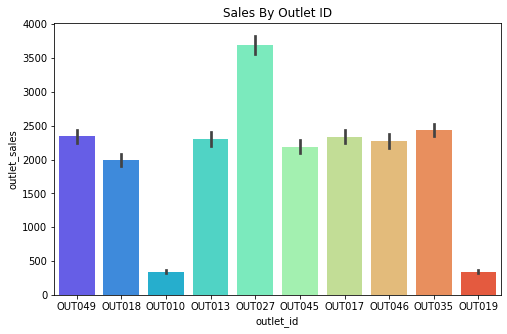

In [ ]:
# Understanding the performace by the outlets

plt.figure(figsize=(8,5))
sns.barplot(x='outlet_id',y='outlet_sales',data=train_set, palette='rainbow')
plt.title("Sales By Outlet ID")

# OUT27 had the most outlet sales as compared to the other 9 outlets.
# OUT10 and OUT19 had the least sales.

From the graph, we can see that OUT027 has the highest ouletsales and OUT010 being the store with the lowest sales.

Text(0.5, 1.0, 'Sales by Outlet Size')

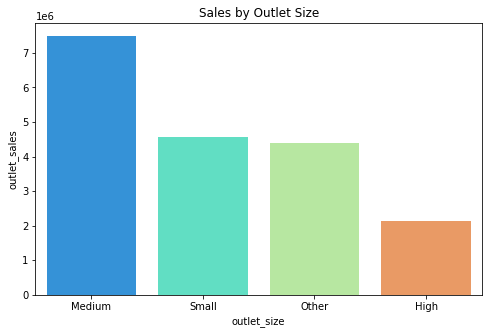

In [ ]:
# Performance by outlet sizes

out_size = train_set[['outlet_size', 'outlet_sales']]

out_size = out_size.groupby(['outlet_size'], as_index= False).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
out_size.head(1)


plt.figure(figsize=(8,5))
sns.barplot(x='outlet_size',y='outlet_sales',data=out_size, palette='rainbow')
plt.title("Sales by Outlet Size")

# The medium outlet sizes had most sales compared to the other outlet sizes.

The medium-sizeD outlet has the highest number of sales and high-sized outlet stores having the lowest sales.

There is only one high-sized outlet.

Text(0.5, 1.0, 'Sales by Outlet Type')

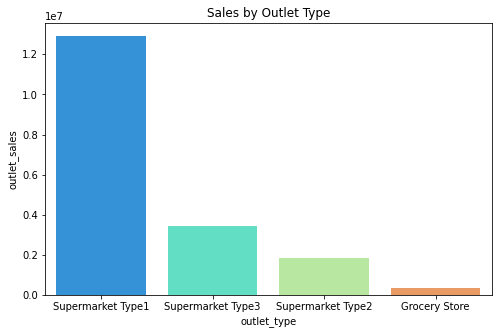

In [ ]:
# Performance by outlet types
# to go through it

out_type = train_set[['outlet_type', 'outlet_sales']]

out_type = out_type.groupby(['outlet_type'], as_index= False).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
out_type.head(1)

plt.figure(figsize=(8,5))
sns.barplot(x='outlet_type',y='outlet_sales',data=out_type, palette='rainbow')
plt.title("Sales by Outlet Type")

# The outlet type with the most sales was Supermarket type 3 while Grocery store had the least sales.
# A lot of support is needed to boost sales for the grocery stores.
# Supermarket Type 3 is the oldest oulet to be established in 1985 and the only type 3 supermarket.

On the outlet type, we can observe that Supermarket type 1 has the highest number of sales followed by type 3 then type2 and lastly the grocery stores having the lowest sales.

Text(0.5, 1.0, 'Sales by Location Type')

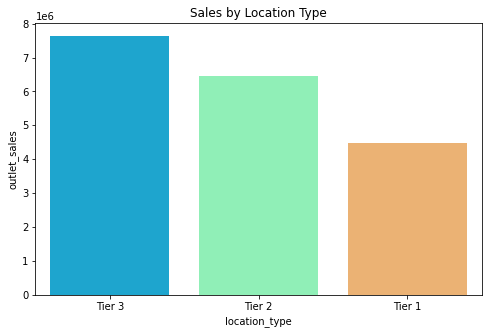

In [ ]:
# Performance according to location types

loc_type = train_set[['location_type', 'outlet_sales']]

loc_type = loc_type.groupby(['location_type'], as_index= False).sum('outlet_sales').sort_values('outlet_sales', ascending = False)
loc_type.head(1)

plt.figure(figsize=(8,5))
sns.barplot(x='location_type',y='outlet_sales',data=loc_type, palette='rainbow')
plt.title("Sales by Location Type")

# The Location type with the highest outlet sales was tier 2 despite tier 3 having more oulets(4) and the least was tier 1

From the bar plot, we can observe that for location type, Tier 3 has the highest sales followed by Tier 2 and finally Tier 1 having the lowest sales.

#### CONCLUSIONS


The most sold product was:

*   Fruits and vegetables with total sales of 2,819,435


The most sold type of fat content product was:

*  Low Fat with total sales of 11,901,328


The most visible product was:

*   Breakfast with 8.6% visibility rate.


The store/outlet with the highest sales was:

*   OUT027 with sales of 3,453,454


The medium size stores had the highest sales in 2013. OUT027 is a medium sized store.

The location type that had the highest sales was:

*   Tier 3 with total sales of 7,635,070.

*   The store with the highest sales was in this location type.


The outlet type with the highest sales was:

*   Supermarket Type 1 with total sales of 12,914,551.


In [ ]:
class Student:
  increase_amount = 1.03

  def_init_(self,first,last,score):
    self.first = first
    self.last = last
    self.email = first+ '.'+last+'@email.com'
    self.score = score

  def fullname(self):
    return '{}{}'.format(self.first,self.last)

  def increase_score(self):
    self.score = self.score*self.increase_amount


SyntaxError: ignored

In [ ]:
class Student:
  increase_amount = 1.03

  def_init_(self,first,last,score):
    self.first = first
    self.last = last
    self.email = first+ '.'+last+'@email.com'
    self.score = score

  def fullname(self):
    return '{}{}'.format(self.first,self.last)

  def increase_score(self):
    self.score = self.score*Student.increase_amount

SyntaxError: ignored